### Positional Encoding 시각화

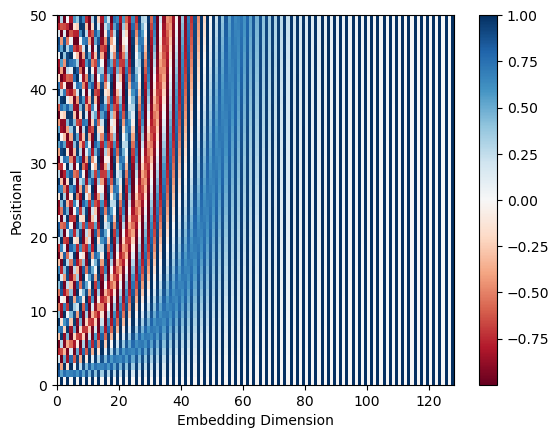

In [1]:
import math
import torch 
from torch import nn
from matplotlib import pyplot as plt

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len, dropout=0.1):
        super().__init__()
        
        self.dropout = nn.Dropout(p=dropout) 
        # 인코딩 후 드롭아웃 적용

        position = torch.arange(max_len).unsqueeze(1)
        # torch.arange(max_len) : 0부터 max_len까지의 정수로 이루어진 1차원 텐서 생성
        # .unsqueeze(1) : 텐서의 두번째 차원에 차원을 추가하여 (max_len,i) 모양의 2D 텐서를 생성
        div_term = torch.exp(
            torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        # 주파수 조정 값 div_term 계산
        # 최종적으로는 지수 함수(exp 함수)로 변환하여 주파수를 조정한다. 과정으로는 짝수 인덱스의 위치를 계산과 위치 인코딩에 사용되는 파라미터 값을 사용한다.

        pe = torch.zeros(max_len, 1, d_model)
        # 위치 인코딩 값을 저장하는 텐서로, 초깃값은 0이다.
        pe[:,0,0::2] = torch.sin(position * div_term)
        pe[:,0,1::2] = torch.cos(position * div_term)
        # 짝수 인덱스는 사인 함수를, 홀수 인덱스는 코사인 함수를 사용한다.
        self.register_buffer("pe",pe)
        # pe를 버퍼로 등록하여 학습 중 업데이트 되지 않도록 설정한다.

    def forward(self, x):
        x = x + self.pe[: x.size(0)]
        return self.dropout(x)
    # 입력 시퀀스의 길이에 맞게 위치 인코딩 값을 슬라이싱 해준 후, 입력 텐서에 위치 인코딩 값을 더한다.
    # 드롭아웃을 사용하여 과적합을 방지한다.

encoding = PositionalEncoding(d_model=128, max_len=50)

plt.pcolormesh(encoding.pe.numpy().squeeze(),cmap="RdBu")
plt.xlabel("Embedding Dimension")
plt.xlim((0,128))
plt.ylabel("Positional")
plt.colorbar()
plt.show()